# Spatial Vector Data in Python w/ Geopandas
You will use the geopandas library to work with vector data in Python. Geopandas is built on top of the Python Pandas library. It stores spatial data in a tabular, dataframe format.

This notebook will take you through [Lesson 3 in Introductory Earth Data Science](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/) with some additional exercises from the [Geopandas project page](https://geopandas.org/en/v0.8.2/)


# The Code Sprint

In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et


To begin, set your working directory to earth-analytics and then download a single shapefile.

You will start with working with the Natural Earth country boundary lines layer: https://www.naturalearthdata.com/downloads/

Note that below you are using EarthPy to download a dataset from naturalearthdata.com (via Amazon Web Services).

EarthPy automatically creates the earth-analytics directory for you when you use it, but by default makes this directory in your home directory. We're doing this here because you guys are on PCs.

You set the working directory after you download the data as a precaution to ensure that the earth-analytics directory already exists on your computer. This is not a standard order of operations, as we are not using our SU H drive, but we are demonstrating it here to ensure the notebook runs on all computers!

In [2]:
# Download a political boundaries shapefile and set your working directory
et.data.get_data(
    url='https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip')

# Set working directory - earthpy creates earth-analytics for you in your home dir
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

### geopandas
Next, you open the data using geopandas.

***geopandas*** takes all of the data science magic from the pandas library and makes it compatible with shapfiles.

Learn more here: https://geopandas.org/

You can view the first 5 rows of the data using .head() in the same way you used .head() for Pandas dataframes.¶

In [3]:
os.getcwd()

'/home/jovyan/earth-analytics'

We're going to download a second dataset, called coastlines:

In [4]:
#set URL for the dataset
coastlines_url = "https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip"

#download the URL into your earth-analytics folder
et.data.get_data(url=coastlines_url)

#name the filepath relative to your working directory: note this is operating system agnostic
coastlines_path = os.path.join("data", "earthpy-downloads",
                               "ne_50m_coastline",
                               "ne_50m_coastline.shp")

#use geopandas as gpd to "read_file"
coastlines = gpd.read_file(coastlines_path)

#prints "head" just like pandas!
coastlines.head()

,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180 -16.15293, 179.84814 -16.21426..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.0542, 177.2874 -17.0..."
2,0,Coastline,4.0,"LINESTRING (127.37266 0.79131, 127.35381 0.847..."
3,0,Coastline,3.0,"LINESTRING (-81.32231 24.68506, -81.42007 24.7..."
4,0,Coastline,4.0,"LINESTRING (-80.79941 24.84629, -80.83887 24.8..."


## GeoPandas creates GeoDataFrames
The structure of a Geopandas GeoDataFrame is very similar to a Pandas dataframe. This means that all the awesome data wrangling functionality of pandas dataframes can be applied to our spatial vector data as well.

### A few differences include:
The GeoDataFrame contains a geometry column which stores spatial information. The geometry column in your GeoDataFrame stores the boundary information (the lines that make up each shape in your data). This allows you to plot points, lines or polygons.

The GeoDataFrame stores spatial attributes such as coordinate reference systems and spatial extents.

Similar to Pandas, you can plot the data using .plot()

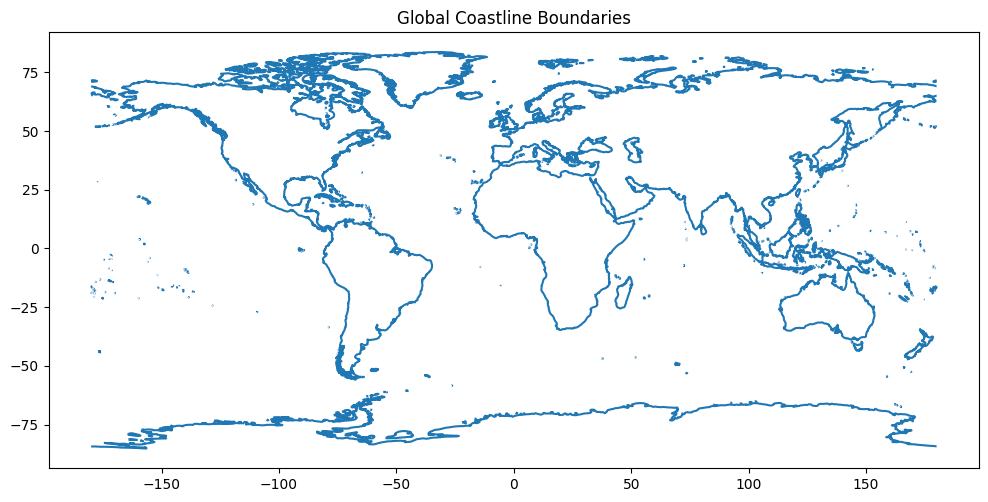

In [5]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Global Coastline Boundaries")
plt.show()

### Check the Spatial Vector Data Type
You can look at the data to figure out what type of data are stored in the shapefile (points, line or polygons). However, you can also get that information by calling .geom_type

In [6]:
# Is the geometry type point, line or polygon?
coastlines.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
1423    LineString
1424    LineString
1425    LineString
1426    LineString
1427    LineString
Length: 1428, dtype: str

Also similar to Pandas, you can view descriptive information about the GeoDataFrame using .info(). This includes the number of columns, rows and the header name and type of each column.¶

In [7]:
coastlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   1428 non-null   int64   
 1   featurecla  1428 non-null   str     
 2   min_zoom    1428 non-null   float64 
 3   geometry    1428 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), str(1)
memory usage: 44.8 KB


### Open point data
Next, you will accesss another online shapefile using Geopandas.

In [8]:
# Open a second layer
et.data.get_data(
    url='https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_populated_places_simple.zip')

# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

#read in a new geopandas data frame called "cities"
cities = gpd.read_file(populated_places_path)

### TASK 1: Is cities a point, line, or polygon file? Type a command to find out and interpret the answer.

In [9]:
# Task 1 answer here
type(cities)
print(cities.geom_type)

#this function tells you which type of vector data you've imported, of types "Point" "Polygon" or "LineString"
?cities.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1246    Point
1247    Point
1248    Point
1249    Point
1250    Point
Length: 1251, dtype: str


Type:        property
String form: <property object at 0x7fd7cf951df0>
Docstring:  
Returns a ``Series`` of strings specifying the `Geometry Type` of each
object.

Examples
--------
>>> from shapely.geometry import Point, Polygon, LineString
>>> d = {'geometry': [Point(2, 1), Polygon([(0, 0), (1, 1), (1, 0)]),
... LineString([(0, 0), (1, 1)])]}
>>> gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
>>> gdf.geom_type
0         Point
1       Polygon
2    LineString
dtype: object

The attributes for a shapefile imported into a GeoDataFrame can be viewed in the GeoDataFrame itself.

In [10]:
# View first 5 rows of GeoDataFrame
cities.head()


# Experiment! How would you view the first 10 rows of a GeoDataFrame?

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,NaN,NaN,Bombo,0,0,...,75000,21000,0.0,8,7,NaN,NaN,7.0,1159113923,POINT (32.5333 0.5833)
1,10,1,5,Admin-1 region capital,Fort Portal,NaN,NaN,Fort Portal,0,0,...,42670,42670,0.0,7,7,NaN,NaN,7.0,1159113959,POINT (30.275 0.671)
2,10,1,3,Admin-1 region capital,Potenza,NaN,NaN,Potenza,0,0,...,69060,69060,0.0,8,8,NaN,NaN,7.0,1159117259,POINT (15.799 40.642)
3,10,1,3,Admin-1 region capital,Campobasso,NaN,NaN,Campobasso,0,0,...,50762,50762,0.0,8,8,NaN,NaN,7.0,1159117283,POINT (14.656 41.563)
4,10,1,3,Admin-1 region capital,Aosta,NaN,NaN,Aosta,0,0,...,34062,34062,0.0,7,7,NaN,NaN,7.0,1159117361,POINT (7.315 45.737)


Just like with Pandas DataFrames, standard arguments can be used to calculate summary statistics on your GeoPandas object:

In [11]:
#Let's see what our most populous city is
#print out the column with maximum population
print(cities.pop_max)
print(cities.iloc[cities.pop_max.idxmax()])

print("The world's largest city  by population is " + cities.name.iloc[cities.pop_max.idxmax()] +
      " with " + str(cities.pop_max.max()) +
      " people!")

0          75000
1          42670
2          69060
3          50762
4          34062
          ...   
1246    11748000
1247    18845000
1248     4630000
1249     5183700
1250     7206000
Name: pop_max, Length: 1251, dtype: int64
scalerank                                  0
natscale                                 600
labelrank                                  2
featurecla                   Admin-0 capital
name                                   Tokyo
namepar                                  NaN
namealt                                  NaN
nameascii                              Tokyo
adm0cap                                    1
capalt                                     0
capin                        De facto capita
worldcity                                  1
megacity                                   1
sov0name                               Japan
sov_a3                                   JPN
adm0name                               Japan
adm0_a3                                  JPN
adm1na

## Geopandas = geographic pandas data frames
The handy thing about working with vector data in geopandas is that you have all of the functionality of pandas at your fingertips. This means that it is easy to do things like:
1. Subset your shapefile based on certain crtiera
2. Merge your shapefile with other datasets
3. Process fields (columns) in your shapefile using python commands.

For example, let's say we are conducting a study on megacities. We can easily identify our megacities using the pop_max field, and use that to create a new geopandas DataFrame of only megacities (cities with a population greater than 10 million.

In [12]:
megacities = cities[cities.pop_max >= 10000000]
print(megacities)
type(megacities)

      scalerank  natscale  labelrank              featurecla            name  \
1097          2       200          2         Admin-1 capital         Karachi   
1150          2       200          1         Populated place           Delhi   
1177          2       200          2         Admin-0 capital           Dhaka   
1203          1       300          5         Admin-0 capital          Manila   
1208          1       300          2  Admin-1 region capital           Ōsaka   
1218          1       300          3         Admin-0 capital    Buenos Aires   
1224          0       600          1         Populated place     Los Angeles   
1226          0       600          1         Populated place        New York   
1228          0       600          5         Admin-1 capital        Istanbul   
1231          0       600          2         Admin-0 capital          Moscow   
1232          0       600          2         Admin-0 capital     Mexico City   
1235          0       600          1    

geopandas.geodataframe.GeoDataFrame

### Creating Maps Using Multiple Shapefiles
You can create maps using multiple shapefiles with Geopandas in a similar way that you may do so using a graphical user interface (GUI) tool like ArcGIS or QGIS (open source alternative to ArcGIS). To do this you will need to open a second spatial file. Below you will use the Natural Earth populated places shapefile to add additional layers to your map.

To plot two datasets together, you will first create a Matplotlib figure object. Notice in the example below that you define the figure ax1 in the first line. You then tell GeoPandas to plot the data on that particular figure using the parameter ax=

The code looks like this:

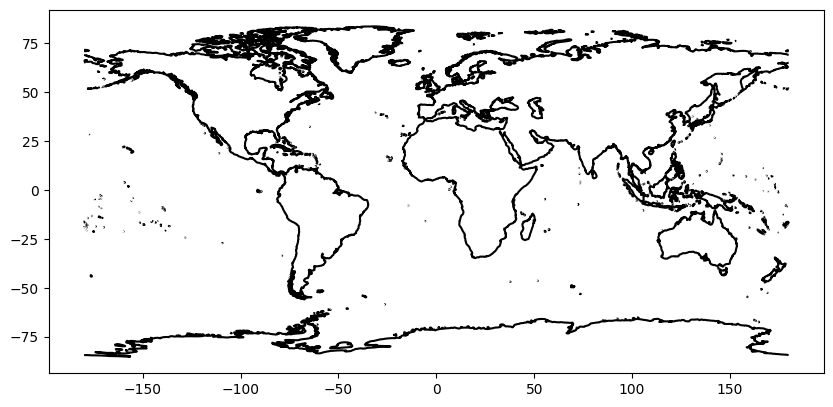

In [13]:
#Experiment!
#What happens if you change FigSize numbers?
#What happens if you "comment out" (put a # in front of) plt.show()?
#What happens if you change the color?

f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1,
               color = "black")
plt.show()

To add another layer to your map, you can add a second .plot() call and specify the ax= to be ax1 again. This tells Python to layer the two datasets in the same figure. Identify the lines of code that differ between the cell above and below. What do these lines of code do?

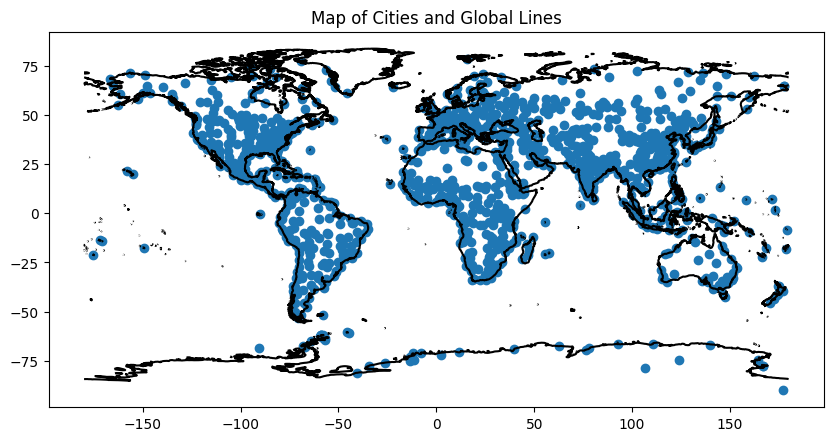

In [14]:
# Create a map or plot with two data layers

#Experiment! What happens if you remove ax=ax1 from coastlines.plot() and cities.plot()?

f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1,
                color="black")
cities.plot(ax=ax1)

# Add a title
ax1.set(title="Map of Cities and Global Lines")
plt.show()

Learn more about custom plotting in Python:

https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/

https://geopandas.org/gallery/plotting_with_geoplot.html

### TASK 2
Using the resources above, create a map that contains:
1. Coastal lines (black)
2. Cities, excluding megacities (points), with a color scale for pop_max
3. Megacities (large black points)
3. A legend

In [15]:
# hint:
?cities.plot

Signature:      cities.plot(*args, **kwargs)
Type:           GeoplotAccessor
String form:    <geopandas.plotting.GeoplotAccessor object at 0x7fd7d07da450>
File:           ~/.local/lib/python3.11/site-packages/geopandas/plotting.py
Docstring:     
Plot a GeoDataFrame.

Generate a plot of a GeoDataFrame with matplotlib.  If a
column is specified, the plot coloring will be based on values
in that column.

Parameters
----------
column : str, np.array, pd.Series, pd.Index (default None)
    The name of the dataframe column, np.array, pd.Series, or pd.Index
    to be plotted. If np.array, pd.Series, or pd.Index are used then it
    must have same length as dataframe. Values are used to color the plot.
    Ignored if `color` is also set.
kind: str
    The kind of plots to produce. The default is to create a map ("geo").
    Other supported kinds of plots from pandas:

    - 'line' : line plot
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'bo

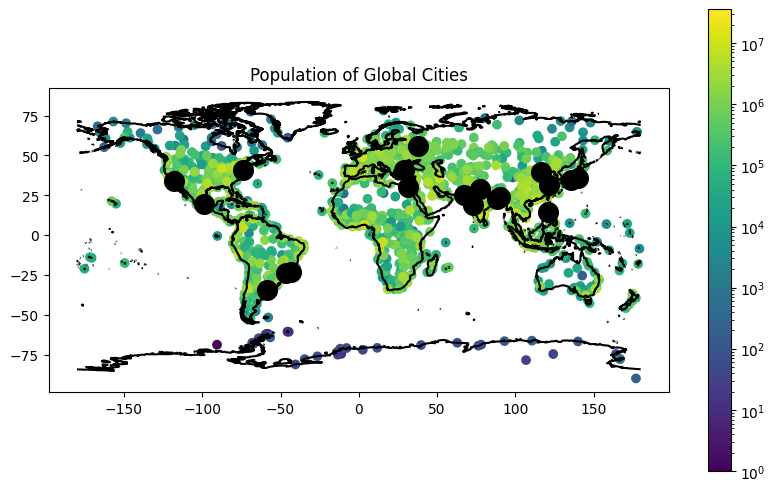

Signature:      cities.plot(*args, **kwargs)
Type:           GeoplotAccessor
String form:    <geopandas.plotting.GeoplotAccessor object at 0x7fd7c811a9d0>
File:           ~/.local/lib/python3.11/site-packages/geopandas/plotting.py
Docstring:     
Plot a GeoDataFrame.

Generate a plot of a GeoDataFrame with matplotlib.  If a
column is specified, the plot coloring will be based on values
in that column.

Parameters
----------
column : str, np.array, pd.Series, pd.Index (default None)
    The name of the dataframe column, np.array, pd.Series, or pd.Index
    to be plotted. If np.array, pd.Series, or pd.Index are used then it
    must have same length as dataframe. Values are used to color the plot.
    Ignored if `color` is also set.
kind: str
    The kind of plots to produce. The default is to create a map ("geo").
    Other supported kinds of plots from pandas:

    - 'line' : line plot
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'bo

In [16]:
import matplotlib.colors as mcolors
# Format and plot your results from task 2
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1,
                color="black"
               )
cities.plot(ax=ax1,
            column=cities.pop_max,
            norm=mcolors.LogNorm(vmin=cities.pop_max.min()+1, vmax=cities.pop_max.max()),
            legend = True
           )

megacities.plot(ax=ax1, color='black',
                markersize=200,
                )
# Add a title
ax1.set(title="Population of Global Cities")
plt.show()
# hint:
?cities.plot

### Geoprocessing Vector Data Geoprocessing in Python: Clip Data
Sometimes you have spatial data for a larger area than you need to process. For example you may be working on a project for your state or country. But perhaps you have data for the entire globe.

You can clip the data spatially to another boundary to make it smaller. Once the data are clipped, your processing operations will be faster. It will also make creating maps of your study area easier and cleaner.

In this workflow, you'll subset your cities data to only look at counties in the United States. First, we'll import a dataset of global political boundaries.

In [17]:
country_data_url = "https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip"
et.data.get_data(url=country_data_url)

# Create a path to the countries shapefile
countries_path = os.path.join("data", "earthpy-downloads",
                              "ne_50m_admin_0_countries",
                              "ne_50m_admin_0_countries.shp")

# Read in the countries shapefile as GeoPandas dataframe
countries = gpd.read_file(countries_path)

# View attribute table:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


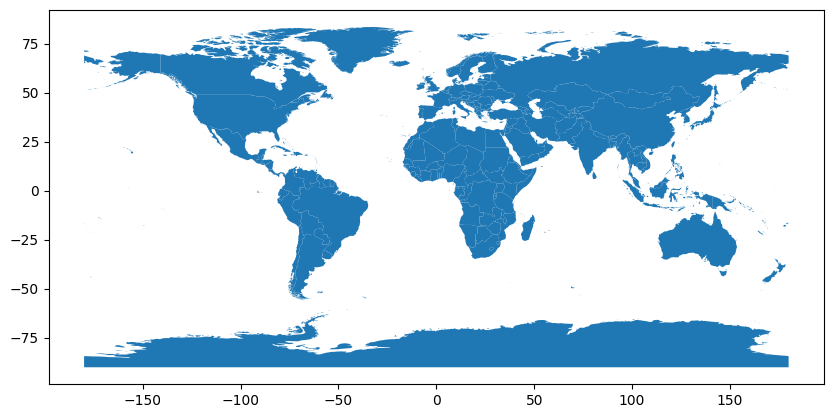

In [18]:
f, ax = plt.subplots(figsize=(10, 6))
countries.plot(ax=ax)
plt.show()

### Next, we'll use built-in pandas funcitonality to subset the shapefile to just the US boundary

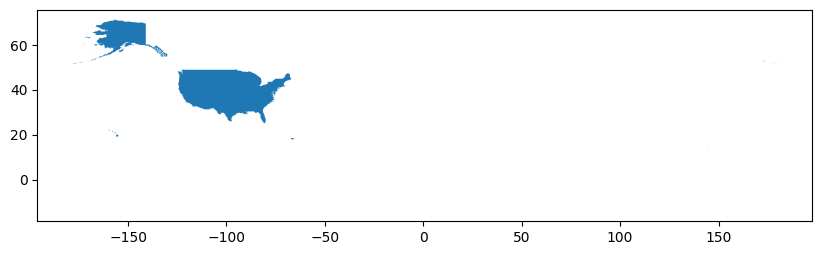

In [19]:
# Subset the countries data to just a single country
united_states_boundary = countries.loc[countries['SOVEREIGNT']
                                       == 'United States of America']

# Notice in the plot below, that only the boundary for the USA is in the new variable
f, ax = plt.subplots(figsize=(10, 6))
united_states_boundary.plot(ax=ax)
plt.show()

### Now, we'll subset the cities layer to include only records which overlap in space with the united_states_boundary layer (aka are in the United States)

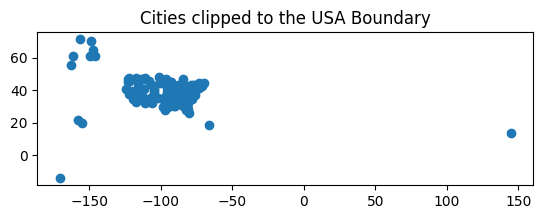

In [20]:
# Clip the cities data to the USA boundary
# Note -- this operation may take some time to run - be patient
cities_in_usa = gpd.clip(cities, united_states_boundary)

# Plot your final clipped data
f, ax = plt.subplots()
cities_in_usa.plot(ax=ax)
ax.set(title="Cities clipped to the USA Boundary")
plt.show()

## TASK 3: How many cities are in the United States?

In [21]:
# Task 3 code here

num_cities = cities_in_usa.shape[0]
print("There are " + str(num_cities) + " cities in the United States")


There are 106 cities in the United States


## TASK 4: What is the largest city in the United States? What is the population of that city?


In [22]:
#Task 4 code here
print("The largest city in the US is "+
      str(cities_in_usa.name[cities_in_usa['pop_max'].idxmax()])+
      " with a population of " +
     str(cities_in_usa.pop_max[cities_in_usa['pop_max'].idxmax()])+
     " people... \n but that's only because we accidentally cropped NYC (#NYStrong)")

The largest city in the US is Los Angeles with a population of 12500000 people... 
 but that's only because we accidentally cropped NYC (#NYStrong)


## Merging vector data in geopandas
One of our primary goals using geographic information systems (GIS) software in Environmental Data Science is to collocate information from different sources into a single analaysis-ready dataset. When we're working with vector data, this often means adding new columns to a geopandas dataframe containing values from another dataset.

There are two ways to combine datasets in geopandas – attribute joins and spatial joins. [From Geopandas.org](https://geopandas.org/en/v0.8.2/mergingdata.html)

*   **Attribute joins:** a GeoSeries or GeoDataFrame is combined with a regular pandas Series or DataFrame based on a common variable. This is analogous to normal merging or joining in pandas.

*   **Spatial joins:** a Spatial Join, observations from two GeoSeries or GeoDataFrames are combined based on their spatial relationship to one another.Indented block

First, we'll bring in another dataset of countries:


In [23]:
# read in country shapefile from the geopandas datasets collection
world = et.data.get_data(url='https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip')
world_path = os.path.join("data", "earthpy-downloads",
                                     "ne_110m_admin_0_countries",
                                     "ne_110m_admin_0_countries.shp")

#read in a new geopandas data frame called "cities"
world = gpd.read_file(world_path)
print(world)

Extracted output to /home/jovyan/earth-analytics/data/earthpy-downloads/ne_110m_admin_0_countries
          featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

 

Let's say we want to add the "continent" field (column) in the world geodataframe to the cities dataframe. Using an attribute join, we first find two columns that contain the same values:

In [24]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,NaN,NaN,Unrecognized,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [25]:
print(sorted(world.SOV_A3.unique()))
print(sorted(cities.sov_a3.unique()))
print("There are " + str(len(world.SOV_A3.unique()))+ " unique country codes in the world dataset")
print("There are " + str(len(cities.sov_a3.unique()))+ " unique country codes in the city dataset")

['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATA', 'AU1', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CH1', 'CHE', 'CHL', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CRI', 'CU1', 'CYN', 'CYP', 'CZE', 'DEU', 'DJI', 'DN1', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FI1', 'FJI', 'FR1', 'GAB', 'GB1', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'IS1', 'ISL', 'ITA', 'JAM', 'JOR', 'JPN', 'KA1', 'KEN', 'KGZ', 'KHM', 'KOR', 'KOS', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NL1', 'NOR', 'NPL', 'NZ1', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRK', 'PRT', 'PRY', 'QAT', 'ROU', 'RUS', 'RWA', 'SAH', 'SAU', 'SDN', 'SDS', 'SEN', 'SLB', 'SLE', 'SLV', 'SOL', 'SOM', 'SRB', 'SUR'

We do not have continent data for all of the countries represented in the city database, but we have some!

In [26]:
# First, we'll make a new pandas dataframe containing only the  iso_a3, and continent information:
continents = world[['SOV_A3', 'CONTINENT']]

In [27]:
# Then, we'll merge this data to the cities dataset:
cities = cities.merge(continents, left_on='sov_a3', right_on='SOV_A3')

# Is cities still a geopandas dataframe?
type(cities)

#On what continents do we have cities?
cities.CONTINENT.unique()

<StringArray>
[       'Africa',        'Europe',          'Asia',    'Antarctica',
 'South America', 'North America',       'Oceania']
Length: 7, dtype: str

A spatial join involves fusing two datasets based on the euclidian distances calculated between feature locations.


Sjoin Arguments

`sjoin()` has two core arguments: how and op.

**op**

The op argument specifies how geopandas decides whether or not to join the attributes of one object to another. There are three different join options as follows:

    intersects: The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.

    within: The attributes will be joined if the object’s boundary and interior intersect only with the interior of the other object (not its boundary or exterior).

    contains: The attributes will be joined if the object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all.

You can read more about each join type in the Shapely documentation.

**how**

The how argument specifies the type of join that will occur and which geometry is retained in the resultant geodataframe. It accepts the following options:

    left: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column

    right: use index from second (or right_df); retain only the right_df geometry column

    inner: use intersection of index values from both geodataframes; retain only the left_df geometry column

Note more complicated spatial relationships can be studied by combining geometric operations with spatial join. To find all polygons within a given distance of a point, for example, one can first use the buffer method to expand each point into a circle of appropriate radius, then intersect those buffered circles with the polygons in question.


In [28]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,NaN,NaN,Unrecognized,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [29]:
# Create a countries shapefile with only one attribute (column), called 'SOVEREIGNT':
countries = world[['geometry', 'SOVEREIGNT']]
# Rename "SOVERIGNT" to "name"
countries = countries.rename(columns={"geometry": "geometry", "SOVEREIGNT": "name"})
countries.head()


,geometry,name
0,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji
1,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",United Republic of Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara
3,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada
4,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States of America


In [30]:
# Recall all the attributes of cities:
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry,SOV_A3,CONTINENT
0,10,1,5,Admin-1 region capital,Bombo,NaN,NaN,Bombo,0,0,...,0.0,8,7,NaN,NaN,7.0,1159113923,POINT (32.5333 0.5833),UGA,Africa
1,10,1,5,Admin-1 region capital,Fort Portal,NaN,NaN,Fort Portal,0,0,...,0.0,7,7,NaN,NaN,7.0,1159113959,POINT (30.275 0.671),UGA,Africa
2,10,1,3,Admin-1 region capital,Potenza,NaN,NaN,Potenza,0,0,...,0.0,8,8,NaN,NaN,7.0,1159117259,POINT (15.799 40.642),ITA,Europe
3,10,1,3,Admin-1 region capital,Campobasso,NaN,NaN,Campobasso,0,0,...,0.0,8,8,NaN,NaN,7.0,1159117283,POINT (14.656 41.563),ITA,Europe
4,10,1,3,Admin-1 region capital,Aosta,NaN,NaN,Aosta,0,0,...,0.0,7,7,NaN,NaN,7.0,1159117361,POINT (7.315 45.737),ITA,Europe


In [31]:
# Check and see if the merge worked
cities_with_country = gpd.sjoin(cities, countries, how="inner", predicate='intersects')
cities_with_country.head()

,scalerank,natscale,labelrank,featurecla,name_left,namepar,namealt,nameascii,adm0cap,capalt,...,rank_min,meganame,ls_name,min_zoom,ne_id,geometry,SOV_A3,CONTINENT,index_right,name_right
0,10,1,5,Admin-1 region capital,Bombo,NaN,NaN,Bombo,0,0,...,7,NaN,NaN,7.0,1159113923,POINT (32.5333 0.5833),UGA,Africa,168,Uganda
1,10,1,5,Admin-1 region capital,Fort Portal,NaN,NaN,Fort Portal,0,0,...,7,NaN,NaN,7.0,1159113959,POINT (30.275 0.671),UGA,Africa,168,Uganda
2,10,1,3,Admin-1 region capital,Potenza,NaN,NaN,Potenza,0,0,...,8,NaN,NaN,7.0,1159117259,POINT (15.799 40.642),ITA,Europe,141,Italy
3,10,1,3,Admin-1 region capital,Campobasso,NaN,NaN,Campobasso,0,0,...,8,NaN,NaN,7.0,1159117283,POINT (14.656 41.563),ITA,Europe,141,Italy
4,10,1,3,Admin-1 region capital,Aosta,NaN,NaN,Aosta,0,0,...,7,NaN,NaN,7.0,1159117361,POINT (7.315 45.737),ITA,Europe,141,Italy


## TASK 5:
In this markdown cell in your own words, explain how the spatial join worked. How does this differ from the attribute join?

*A: The spatial join adds columns to the original geopandas dataframe, with individual data entries associated based on proximity in cartesian space. In other words, we're combining the columns from the two datasets, and finding which entry belongs in which row by spatial proximity. In the attribute join, we're adding new columns to a dataframe based on which rows in the a shared column have the same value.*  

## Nested features
Often, vector spatial features will be nested within each other. For example, in the world dataset, there are countries which are nested within continents.

If you wanted to extract just the continent outlines, you would need to erase the country boundaries within each continent. We can use the **dissolve** function to do this.

In a non-spatial setting, when all we need are summary statistics of the data, we aggregate our data using the `groupby` function. But for spatial data, we sometimes alsoIn a non-spatial setting, when all we need are summary statistics of the data, we aggregate our data using the groupby function.

`dissolve` can be thought of as doing three things: (a) it dissolves all the geometries within a given group together into a single geometric feature (using the unary_union method), and (b) it aggregates all the rows of data in a group using groupby.aggregate(), and (c) it combines those two results.


,geometry
CONTINENT,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6..."
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012..."
Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13...."
Europe,"MULTIPOLYGON (((-53.55484 2.3349, -53.77852 2...."
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421..."


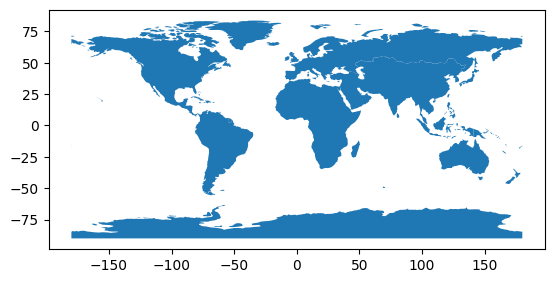

In [32]:
world = world[['CONTINENT', 'geometry']]

continents = world.dissolve(by='CONTINENT')

continents.plot();

continents.head()

If we are interested in aggregate populations, however, we can pass different functions to the dissolve method to aggregate populations using the `aggfunc = ` argument:

,geometry,POP_EST
CONTINENT,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1.306370e+09
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4.490000e+03
Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",4.550277e+09
Europe,"MULTIPOLYGON (((-53.55484 2.3349, -53.77852 2....",7.454125e+08
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",5.837560e+08


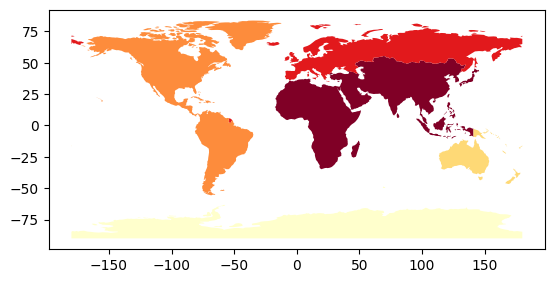

In [33]:
# Re-read in the world dataset
world = et.data.get_data(url='https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip')
world_path = os.path.join("data", "earthpy-downloads",
                                     "ne_110m_admin_0_countries",
                                     "ne_110m_admin_0_countries.shp")

#read in a new geopandas data frame called "cities"
world = gpd.read_file(world_path)

# Select only the attributes we're interested in:
world = world[['CONTINENT', 'geometry', 'POP_EST']]

# Dissolve into country aggregates, collecting the sum of other attributes
continents = world.dissolve(by='CONTINENT', aggfunc='sum')

continents.plot(column = 'POP_EST', scheme='quantiles', cmap='YlOrRd');
continents.head()

## TASK 6-8: putting it together
Use your skills with `merge`, `dissolve`, and pandas math to do the following:
6. What is the total urban population on each continent? Show your results as a chloropleth map and a table.
7. What fraction of the total population lives in cities in each continent? Show your results as a chloropleth map and a table.
8. What is the most urban continent on earth (largest share of the population lives in cities)?

In [34]:
cities_with_country.columns

Index(['scalerank', 'natscale', 'labelrank', 'featurecla', 'name_left',
       'namepar', 'namealt', 'nameascii', 'adm0cap', 'capalt', 'capin',
       'worldcity', 'megacity', 'sov0name', 'sov_a3', 'adm0name', 'adm0_a3',
       'adm1name', 'iso_a2', 'note', 'latitude', 'longitude', 'pop_max',
       'pop_min', 'pop_other', 'rank_max', 'rank_min', 'meganame', 'ls_name',
       'min_zoom', 'ne_id', 'geometry', 'SOV_A3', 'CONTINENT', 'index_right',
       'name_right'],
      dtype='str')

<Axes: >

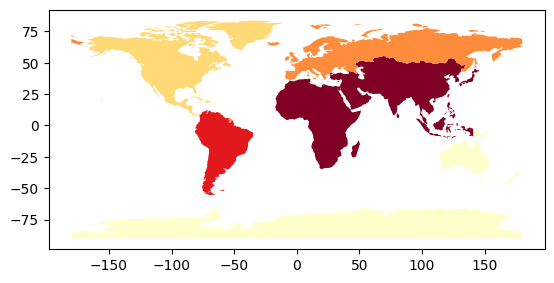

In [35]:
 # Task 6 code here:
#Create subset of cities dataset with only relevant information
continental_cities = cities_with_country[['CONTINENT','geometry','pop_max']]

# Dissolve cities dataset by continent column, taking the sum of all "pop_max" for cities in a common continent
continental_urban_pop = continental_cities.dissolve(by='CONTINENT', aggfunc='sum')

# Attribute merge with continent shapefile
continent_urban_merge = continents.merge(continental_urban_pop['pop_max'], how='inner', left_index=True, right_index=True)

#plot results
continent_urban_merge.plot(column='pop_max', scheme='quantiles', cmap='YlOrRd')

# Notice how the relative urban population differs from relative total population globally


,geometry,POP_EST,pop_max,urb_pop_per
CONTINENT,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1.306370e+09,161701382,0.123779
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4.490000e+03,546,0.121604
Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",4.550277e+09,466910225,0.102611
Europe,"MULTIPOLYGON (((-53.55484 2.3349, -53.77852 2....",7.454125e+08,132277823,0.177456
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",5.837560e+08,75358954,0.129093
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",4.120487e+07,642297,0.015588
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.2321 ...",4.270667e+08,156026741,0.365345


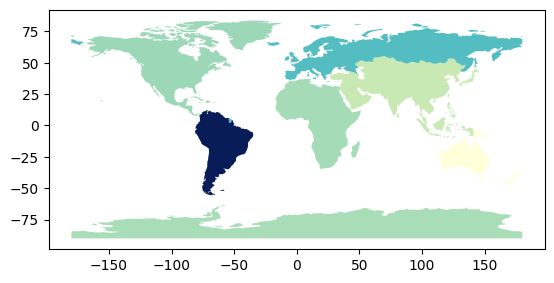

In [36]:
# Task 6 code here:
continent_urban_merge['urb_pop_per'] = continent_urban_merge['pop_max']/continent_urban_merge['POP_EST']
continent_urban_merge.plot(column='urb_pop_per',  cmap='YlGnBu')
continent_urban_merge.head(7)

In [37]:
# Task 8 code here:
urb_cont = continent_urban_merge.urb_pop_per.idxmax()
print("The most urban continent on the globe is " + urb_cont + ",\n with "+ str(round(continent_urban_merge.urb_pop_per.max()*100, 2)) + " % of people living in cities")

The most urban continent on the globe is South America,
 with 36.53 % of people living in cities
